# Homework 3: Decision trees

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

## Introducing the data set
 
For this  assignment you'll be looking at Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/) dataset.
The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it to the same directory as this notebook.

## Exercise 1: Exploratory data analysis

rubric={points:30}

#### 1(a) 
rubric={points:2}

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. 

Hints: 
1. There is a missing column name for the first one. Usually, `pandas` give a placehold name, e.g. `Unnamed: 0`.
2. The first column `Unnamed: 0` of the .csv file should be dropped.

In [2]:
# BEGIN YOUR CODE HERE 

spotify_df = None

spotify_df = pd.read_csv("spotify.csv")
spotify_df = spotify_df.iloc[: , 1:]

# END YOUR CODE HERE

spotify_df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


#### 1(b)
rubric={points:2}

Run the following line of code to split the data.

Note: we are setting the `random_state` so that everyone has the same split on their assignments. 
This will make it easier for the TAs to grade.

In [3]:
# Do not modify this cell
df_train, df_test = train_test_split(spotify_df, test_size=0.25, random_state=123)

 How many training and test examples do we have?
 Please print the row numbers for `df_train` and `df_test`.

In [4]:
# print the number of training and testing examples
# BEGIN YOUR CODE HERE
from lib2to3.pgen2.token import NEWLINE


df_trainlen = len(df_train.index)
df_testlen = len(df_test.index)

print("Number of rows in df_train = " + str(df_trainlen))
print("Number of rows in df_test = " + str(df_testlen))

# END YOUR CODE HERE

Number of rows in df_train = 1512
Number of rows in df_test = 505


#### 1(c)
rubric={points:4}

Print out the output of [describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) **on the training split**. This will compute some summary statistics of the numeric columns.

Hints: 
1. Note that `describe` returns another DataFrame for the summary. (Or you can consider the summary is presented in a format of DataFrame.)

In [5]:
# BEGIN YOUR CODE HERE
df_summary = df_train.describe()

# END YOUR CODE HERE
df_summary

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,0.185337,0.617565,247606.240741,0.682022,0.139041,5.406746,0.189816,-7.089587,0.619048,0.090843,121.978905,3.964947,0.501758,0.511243
std,0.257866,0.163086,81841.143743,0.211498,0.279536,3.635880,0.154115,3.841885,0.485782,0.086574,27.121977,0.253555,0.246599,0.500039
min,0.000005,0.122000,16042.000000,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.035900,0.000000
25%,0.009460,0.512000,200072.000000,0.564000,0.000000,2.000000,0.092200,-8.389000,0.000000,0.037375,100.500750,4.000000,0.298750,0.000000
50%,0.063700,0.629500,230100.000000,0.713500,0.000076,6.000000,0.127000,-6.239000,1.000000,0.055050,121.974000,4.000000,0.501000,1.000000
75%,0.253000,0.738250,274041.750000,0.847250,0.061100,9.000000,0.243000,-4.756000,1.000000,0.107000,137.938250,4.000000,0.694000,1.000000
max,0.995000,0.984000,849960.000000,0.997000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


Which feature has the smallest range, given this `df_summary`? 

Hints:
1. You can subtract the min value from the max value of the `df_summary` to get the range.
2. Then you use [df.idxmin()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmin.html) to find the index/name of the smallest range.

In [6]:
# BEGIN YOUR CODE HERE

#print("The smalles range of df_summary is " + str((df_summary.loc['max'] - df_summary.loc['min']).idxmin()))
(df_summary.loc['max'] - df_summary.loc['min']).idxmin()

# END YOUR CODE HERE

'speechiness'

#### 1(d) 
rubric={points:12}

Let's focus on the following features:

- danceability
- tempo
- energy
- valence

For each of these features (in order), produce a histogram that shows the distribution of the feature values in the training set, **separated for positive and negative examples**. 
By "positive examples" we mean target = 1 (user liked the song, positive sentiment) and by "negative examples" we mean target = 0 (used disliked the song, negative sentiment). 

As an example, here is what the histogram would look like for a different feature loudness:

<!-- ![](loudness.png) -->
<img src="loudness.png" height="800" width="800"> 

Hints:
1. You don't have to match all the details exactly, such as colour, but your histograms should look something like this, with a reasonable number of bins to see the shape of the distribution.
2. As shown above, there are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram above shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).
3. Make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of your loop, which draws the figure and resets the canvas for your next plot.
4. You can find the histgram function [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).

Here is some code that separates out the dataset into positive and negative examples, to help you get started:

In [7]:
# Do not modify the code  
negative_examples = df_train.query("target == 0")
positive_examples = df_train.query("target == 1")

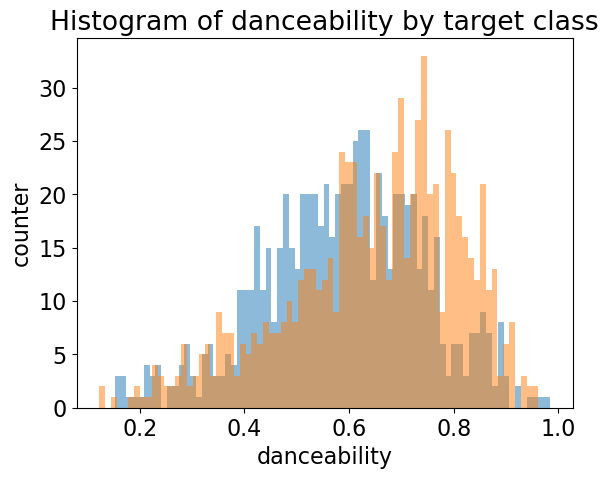

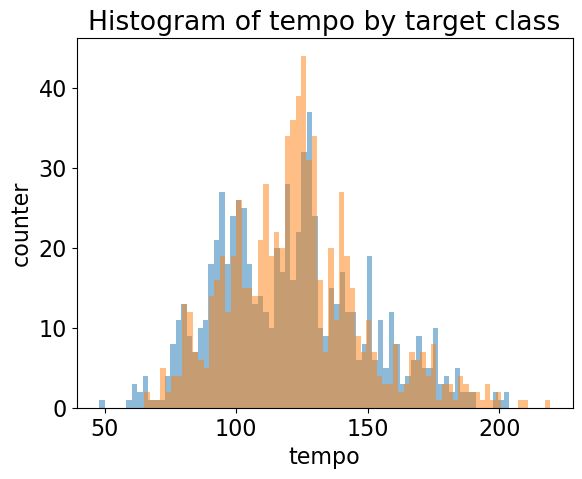

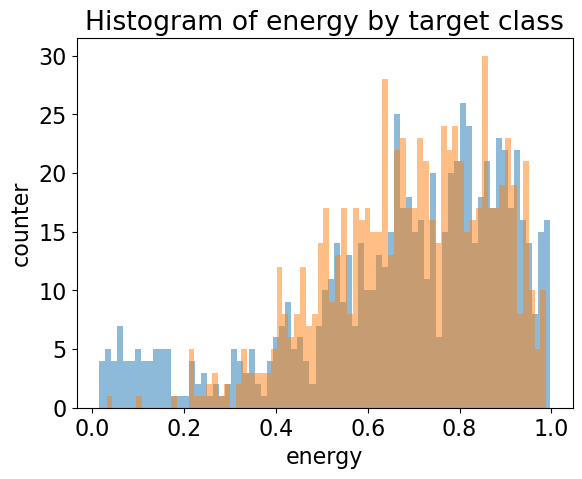

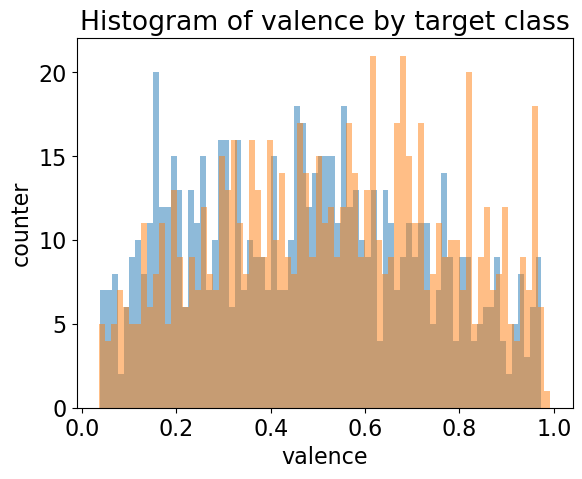

In [8]:
# BEGIN YOUR CODE HERE
features = ['danceability', 'tempo', 'energy', 'valence']

for feature in features:
    plt.hist(negative_examples[feature], bins=75, alpha=0.5)
    plt.hist(positive_examples[feature], bins=75, alpha=0.5)
    plt.title('Histogram of ' + feature + ' by target class')
    plt.xlabel(feature)
    plt.ylabel("counter")

    plt.show()
# END YOUR CODE HERE

#### 1(e)
rubric={points:4}

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. 
Does that mean the feature is not useful for predicting the target class? (Yes or No, and explain your solution)



It does not necessarily mean that it's not useful. Instead, it may mean that it requires a combination of features to describe the target class.

#### 1(f) 
rubric={points:4}

Note that the dataset includes two free text features labeled `song_title` and `artist`:

In [9]:
df_train[["song_title", "artist"]].head()

,song_title,artist
1396,All in Vain,Mot
641,One of Those Nights,Juicy J
1765,Take Me As I Am,Wyclef Jean
1801,Save My Soul,JoJo
1624,Save the World - Radio Mix,Swedish House Mafia


(1) Do you think these features could be useful in predicting whether the user liked the song or not?  Then explain your answer.

I believe that this information could be useful in predicting if the user liked the song or not. For example, if the user likes songs by Juicy J then they may like songs that feature Juicy J or other songs by Juicy J. 

(2) Would there be any difficulty in using them in your model?  If yes, what kind of method can solve this difficulty?

There could be an issue of duplicate entries for the same artist. One thing we could do is consolidate the information to an average of all songs for a particular artist. Or similarly, all songs where an artist is featured.

## Exercise 2: Using sklearn to build a decision tree classifier

Rubric={points:18}

#### 2(a) 
rubric={points:4}

- Create `X_train` and `y_train` and `X_test` and `y_test` from `df_train` and `df_test` above. Skip the `song_title` and `artist` features for now. 
- Fit a [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on the train set.
- Name your classifier as `dt`.

Hints:
1. You first split the features and labels for both `df_train` and `df_test` by using [df.drop()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html).
2. You must name the decision tree classifier as `dt`.
3. You may use the [fit](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit) method to train the classifier.

In [41]:
dt = None

# BEGIN YOUR CODE HERE

df_train, df_test = train_test_split(spotify_df, test_size=0.25, random_state=123)

# df_train
X = df_train.drop(columns=['song_title','artist'])
y = df_test.drop(columns=['song_title','artist'])

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# df_train

#X_train, X_test, y_train, y_test = train_test_split(df_test)


# END YOUR CODE HERE

#### 2(b)
rubric={points:2}

Use the `predict` method to predict the class of the first example in your `X_train`. Is the prediction correct? That is, does it match with the corresponding true label in `y_train`?  Please print your prediction and the true label for the first example.

Hints: 
1. You can grab the first example with `X_train.iloc[[0]]`.

In [11]:
# BEGIN YOUR CODE HERE


# END YOUR CODE HERE

#### 2(c) 
rubric={points:2}

Use the [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) function on your training set to compute the 10-fold cross-validation accuracy of your tree. 

Save the cross validation accuracy to `cv_scores`.

In [12]:
cv_scores = None

# BEGIN YOUR CODE HERE


# END YOUR CODE HERE

cv_scores

#### 2(d)
rubric={points:6}

The above is useful, but we would like to see more results, e.g., `fit_time`, `score_time`, `test_score`, `train_score`. 

- Compute the 10-fold cross-validation again but this time using the [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) function with `return_train_score=True` and `cv=10`. 
- Save the results in `scores`.

In [13]:
scores = None

# BEGIN YOUR CODE HERE


# END YOUR CODE HERE

scores

#### 2(e)
rubric={points:3}

Do you see a significant difference between the training score and the cross-validation score? Briefly discuss.

<font color='red'>YOUR ANSWER HERE</font>

#### 2(f)
rubric={points:3}

Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your cross validation score?

<font color='red'>YOUR ANSWER HERE</font>

## Exercise 3: Hyperparameters 
rubric={points:32}

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

- Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` (at least 10 different values in the range 1 to 25). {points:10}
- For each `max_depth`, get both the **train accuracy** and the **cross-validation accuracy**. {points:6}
- Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which. {points:6}
- Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy. From these results, what depth would you pick as the optimal depth? {points:5}
- Do you think that the depth you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?{points:5}

In [14]:
# BEGIN YOUR CODE HERE


# END YOUR CODE HERE

<font color='red'>YOUR ANSWER HERE</font>

## Exercise 4: Test set
rubric={points:10}

Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 

- Select your favorite `max_depth` from the previous part.
- Train a decision tree classifier using that `max_depth` on the _entire training set_.
- Compute and display the test score. 

In [15]:
# BEGIN YOUR CODE HERE


# END YOUR CODE HERE

How does it compare to the cross-validation score from the previous exercise? Briefly discuss. 

<font color='red'>YOUR ANSWER HERE</font>

## Submission instructions 
rubric={points:10}

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment at Canvas. 
4. Finish the corresponding reflection survey.